In [ ]:
%pip install torch sentence-transformers matplotlib scikit-learn

In [2]:
from sentence_transformers import SentenceTransformer

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define domain-specific words (technology domain example)
words = [
    "computer", "software", "hardware", "AI", "robotics",
    "internet", "cloud", "cybersecurity", "algorithm", "database"
]

# Generate embeddings
embeddings = model.encode(words)

print("Embeddings shape:", embeddings.shape)  # Output shape (10, 384)

/home/khushwant/miniconda3/envs/torch/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Embeddings shape: (10, 384)


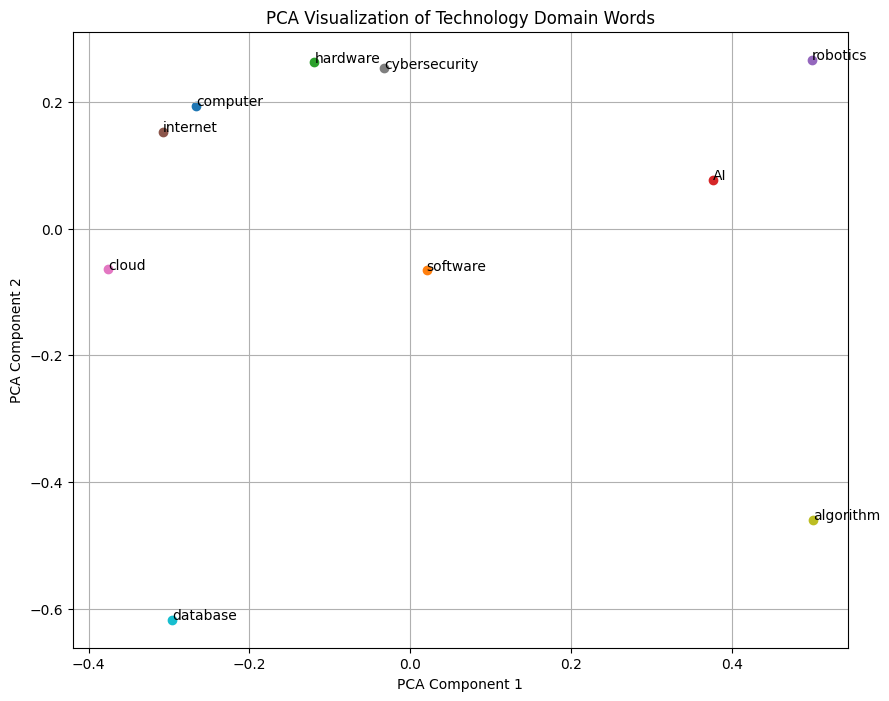

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], word)

plt.title("PCA Visualization of Technology Domain Words")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [4]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Function to find the closest words
def find_similar_words(word, model, words_list, top_n=5):
    word_embedding = model.encode([word])
    all_embeddings = model.encode(words_list)
    
    similarities = cosine_similarity(word_embedding, all_embeddings)[0]
    closest_indices = np.argsort(similarities)[::-1][1:top_n + 1]
    
    similar_words = [(words_list[i], similarities[i]) for i in closest_indices]
    return similar_words

# Example: Find 5 similar words to "AI"
similar_words = find_similar_words("AI", model, words)
print("Top 5 words similar to 'AI':", similar_words)

Top 5 words similar to 'AI': [('robotics', np.float32(0.5379249)), ('software', np.float32(0.49428284)), ('computer', np.float32(0.46965566)), ('algorithm', np.float32(0.44050252)), ('internet', np.float32(0.42500052))]
